# __Простые трансформации__

In [87]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
ORIG_PATH = './images/orig/'
NEW_PATH = './images/new/'

После пороговой фильтрации мы получаем бинарное изображение — но далеко не идеальное. На нём могут быть:
- мелкие шумы
- дырки внутри объектов
- неровные контуры
- разрывы в фигуре
- слипшиеся объекты

Морфология — это набор операций, которые позволяют дочистить изображение и привести бинарную картинку в надлежащий вид. Основа этих операций — свертка с маской, структурирующий элемент, который перемещается по изображению.

## __Структурирующий элемент__

В OpenCV ядро создаётся так:

`kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))`:

- `cv2.MORPH_RECT` — квадрат;
- `cv2.MORPH_ELLIPSE` — круг/овал;
- `cv2.MORPH_CROSS` — крест.

Размер ядра сильно влияет на результат (как для размытия) — 3×3 работает мягко, 7×7 уже заметно меняет форму объектов.

## __Эрозия__

Эрозия — операция минимума по ненулевой области ядра. Она уменьшает белые области.

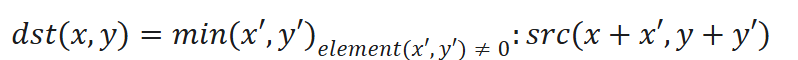

Используется для:
- удаления небольших шумов;
- разрушения тонких перемычек между объектами;
- сужения контура.

`eroded = cv2.erode(image, kernel, iterations=1)` - `iterations` позволяет увеличить силу воздействия — каждое повторение съедает как минимум ещё один пиксель толщины.

## __Дилатацаия__

Дилатация — операция максимума по ненулевой области ядра. 

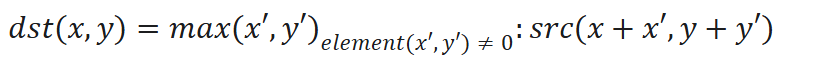

Она расширяет белые области, делает контур толще, заполняет маленькие тёмные отверстия.

`dilated = cv2.dilate(image, kernel, iterations=1)`

Используется, когда нужно:
- "усилить", увеличить объект;
- заполнить дырки в маске;
- соединить разорванные части объекта.

## __Комбинированные трансформации__

## __Практика__

In [109]:
bloon_bgr = cv2.imread(ORIG_PATH + "bloon_big.jpg")
bloon_hsv = cv2.cvtColor(bloon_bgr, cv2.COLOR_BGR2HSV)

# HSV ranges:
# yellow
y_min = np.array([15, 50, 60], np.uint8)
y_max = np.array([50, 255, 255], np.uint8)

bloon_mask = cv2.inRange(bloon_hsv, y_min, y_max)

# kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# eroded = cv2.erode(bloon_mask, kernel_erode, iterations=2)

# kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# dilated = cv2.dilate(eroded, kernel_dilate, iterations=1)

kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opened = cv2.morphologyEx(bloon_mask, cv2.MORPH_OPEN, kernel_open, iterations=5)

masked_image = cv2.bitwise_and(bloon_bgr, bloon_bgr, mask=opened)


cv2.imshow("bloon mask", masked_image)
cv2.waitKey(0)


-1

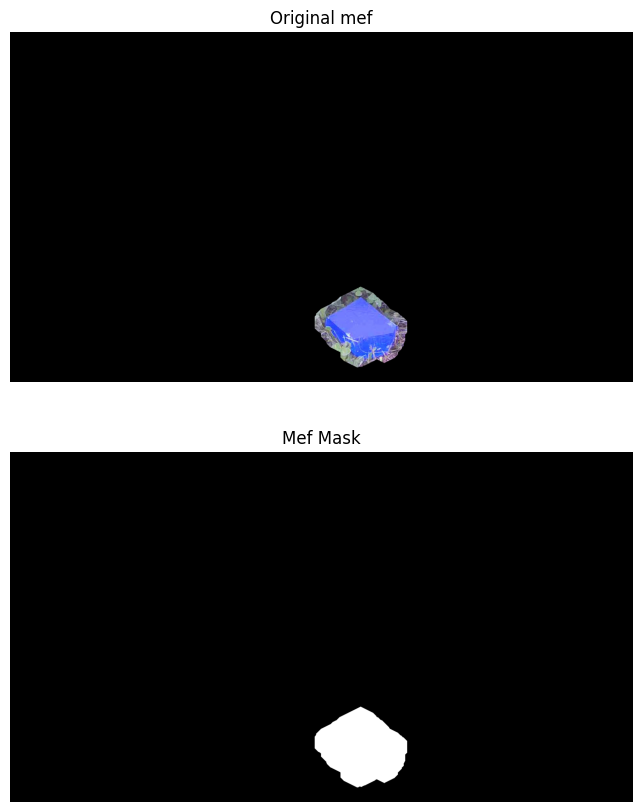

In [108]:
mef_bgr = cv2.imread(ORIG_PATH + "mephedrone.jpg")
mef_hsv = cv2.cvtColor(mef_bgr, cv2.COLOR_BGR2HSV)

# HSV ranges:
# blue
y_min = np.array([110, 0, 0], np.uint8)
y_max = np.array([120, 255, 255], np.uint8)

mef_mask = cv2.inRange(mef_hsv, y_min, y_max)

# kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# eroded = cv2.erode(bloon_mask, kernel_erode, iterations=2)

# kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# dilated = cv2.dilate(eroded, kernel_dilate, iterations=1)

kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened = cv2.morphologyEx(mef_mask, cv2.MORPH_OPEN, kernel_open, iterations=3)
opened[:200] = 0

kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dilated = cv2.dilate(opened, kernel_dilate, iterations=7)

masked_mef = cv2.bitwise_and(mef_bgr, mef_bgr, mask=dilated)


fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].imshow(cv2.cvtColor(masked_mef, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original mef")
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
ax[1].set_title("Mef Mask")
ax[1].axis('off')
plt.show()
